In [1]:
import pandas as pd

INPUT_FNAME = 'hacker_news_data.json'
OUTPUT_FNAME = 'hourly_agg.csv'

df = pd.read_json(INPUT_FNAME)

### Part 0 - EDA

In [2]:
df.shape

(118030, 14)

In [3]:
df.dtypes

by              object
descendants    float64
id               int64
kids            object
score          float64
time             int64
title           object
type            object
url             object
dead           float64
text            object
deleted        float64
poll           float64
parts           object
dtype: object

In [4]:
df.sample()

,by,descendants,id,kids,score,time,title,type,url,dead,text,deleted,poll,parts
37120,ineedasername,0.0,25988802,NaN,3.0,1612188554,Financial media touts retail-driven silver boo...,story,NaN,NaN,It&#x27;s very strange that dominant media cov...,NaN,NaN,NaN


### Task 1

In [5]:
df.assign(words_in_title=df['title'].str.split().str.len().fillna(0)) \
          .groupby(df['time'].apply(lambda ts: pd.to_datetime(ts, unit='s')).round('H')) \
          .agg(mean_score=('score', 'mean'),
               median_score=('score','median'),
               num_words_in_titles=('words_in_title','sum'),
               max_id=('id','max'),
               sum_descendants=('descendants','sum'),
              ) \
            .convert_dtypes() \
            .to_csv(OUTPUT_FNAME)

### Task 2

In [10]:
import plotly.express as px

# we might need a comfort datetime further
df['time'] = df['time'].apply(lambda ts: pd.to_datetime(ts, unit='s'))

#### Number of unique users timeseries

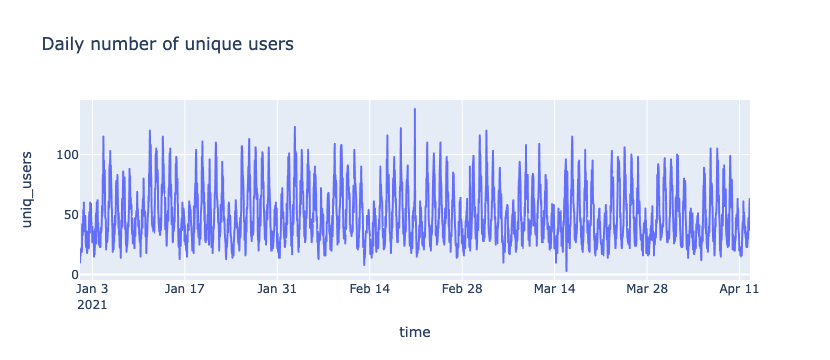

In [91]:
hourly_users = df.groupby(df['time'].round('H')).agg(uniq_users=('id', 'nunique')).reset_index()

px.line(hourly_users, x='time', y="uniq_users", title='Daily number of unique users')

We can observe daily and weekly seasonality 

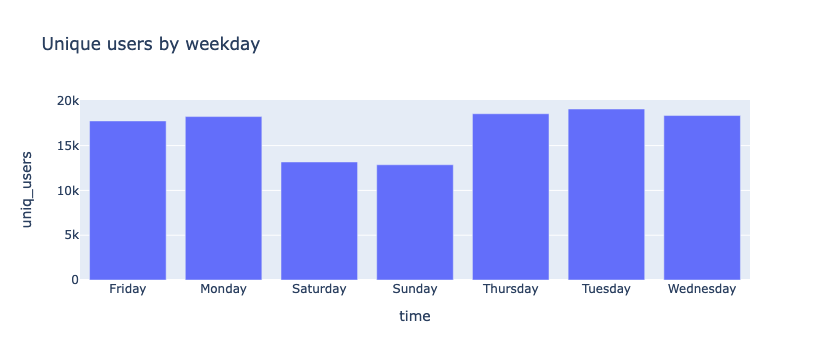

In [36]:
weekday_users= df.groupby(df['time'].apply(lambda dt: dt.day_name())) \
    .agg(uniq_users=('id', 'nunique')) \
    .reset_index()

px.bar(weekday_users, x='time', y='uniq_users', title='Unique users by weekday')

As expected people visit the resource less on weekends

#### Users comebacks

In [65]:
tmp = df.groupby('id', as_index=False).size()
tmp[tmp['size']>1]

,id,size
13753,25756934,2
33783,25955146,2
60582,26205328,2


This is actually a bit strange: only 2 users have visited the resource twice. And no one more!

#### The most popular author

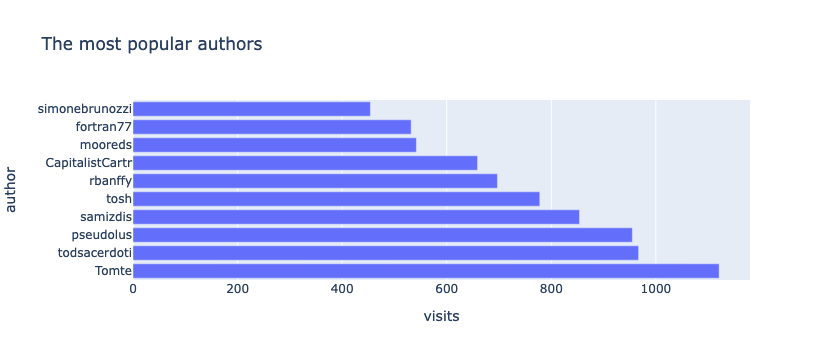

In [90]:
popular_authors = df.groupby('by', as_index=False) \
    .size() \
    .rename(columns={'size': 'visits', 'by': 'author'}) \
    .sort_values(by='visits', ascending=False) \
    .head(10)

px.bar(popular_authors, x='visits', y='author', title='The most popular authors')

**We can add a lot more. Will be glad to discuss it personally**